In [79]:
import pandas as pd
import os
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("train.csv")

In [81]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [82]:
df.shape

(40455, 11)

<AxesSubplot:xlabel='price', ylabel='Count'>

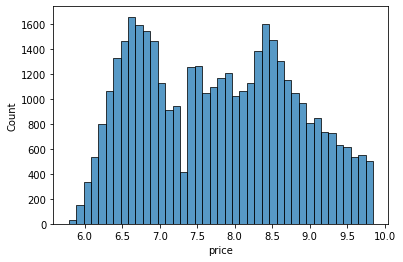

In [83]:
sns.histplot(df.price)

In [84]:
# Elimino las columnas "id" y "cut" porque no aportan nada para predecir el precio del diamante.

df.drop(["cut"], axis = "columns", inplace = True)

In [85]:
df.head()

,id,carat,color,clarity,depth,table,x,y,z,price
0,0,0.53,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [86]:
df.color.unique()

array(['G', 'D', 'I', 'H', 'J', 'F', 'E'], dtype=object)

In [87]:
df.color.value_counts()

G    8477
E    7370
F    7143
H    6196
D    5113
I    4102
J    2054
Name: color, dtype: int64

In [88]:
df.clarity.unique()

array(['SI1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [89]:
df.clarity.value_counts()

SI1     9867
VS2     9243
SI2     6806
VS1     6108
VVS2    3848
VVS1    2727
IF      1305
I1       551
Name: clarity, dtype: int64

In [90]:
df.isna().sum()

id         0
carat      0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [91]:
for colname in df.columns:
    print(f"{colname: <12} {df[colname].nunique()}")

id           40455
carat        268
color        7
clarity      8
depth        179
table        121
x            544
y            538
z            359
price        3513


In [92]:
df.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006186,-0.002316,-0.010840,-0.005675,-0.004038,-0.005649,-0.004040
carat,-0.006186,1.000000,0.025261,0.182888,0.974744,0.950639,0.948895,0.920846
depth,-0.002316,0.025261,1.000000,-0.298380,-0.028188,-0.032829,0.091738,-0.000533
table,-0.010840,0.182888,-0.298380,1.000000,0.197226,0.185480,0.150606,0.159950
x,-0.005675,0.974744,-0.028188,0.197226,1.000000,0.973473,0.966374,0.957934
y,-0.004038,0.950639,-0.032829,0.185480,0.973473,1.000000,0.946517,0.934832
z,-0.005649,0.948895,0.091738,0.150606,0.966374,0.946517,1.000000,0.931147
price,-0.004040,0.920846,-0.000533,0.159950,0.957934,0.934832,0.931147,1.000000


In [93]:
df.corr()["price"].sort_values()

id      -0.004040
depth   -0.000533
table    0.159950
carat    0.920846
z        0.931147
y        0.934832
x        0.957934
price    1.000000
Name: price, dtype: float64

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
df.head()

,id,carat,color,clarity,depth,table,x,y,z,price
0,0,0.53,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [97]:
X=df.drop(["price","color","clarity"], axis=1)
y=df["price"]

In [98]:
lr.fit(X, y)

LinearRegression()

In [99]:
lr.predict(X)[:10]

array([7.30611171, 7.01817803, 6.55548218, 6.51802749, 9.06573562,
       8.2485701 , 8.47489418, 9.03803272, 8.42405718, 7.91948059])

In [100]:
y[:10]

0    7.057
1    6.824
2    6.107
3    6.390
4    8.741
5    8.281
6    8.491
7    8.656
8    8.630
9    8.201
Name: price, dtype: float64

In [101]:
lr.score(X, y)

0.9233451747497682

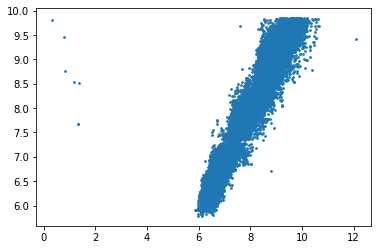

In [102]:
plt.scatter(lr.predict(X), y, s=3)

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

In [104]:
mean_squared_error(
    y_true=y,
    y_pred=lr.predict(X)
)

0.0788221523403423

In [105]:
mean_absolute_error(
    y_true=y,
    y_pred=lr.predict(X)
)

0.20453385346855796

In [106]:
r2_score(
    y_true=y,
    y_pred=lr.predict(X)
)

0.9233451747497682

In [107]:
mean_squared_log_error(
    y_true=y,
    y_pred=lr.predict(X)
)

0.0013267696931009894

In [109]:
df.price.sample(10)

34011    6.649
2354     8.873
33300    7.874
5196     6.898
31234    7.773
21920    6.501
3338     7.570
1550     7.603
20937    7.835
16895    7.862
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='count'>

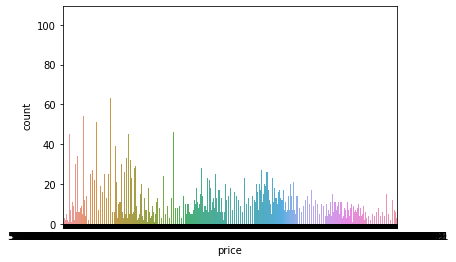

In [110]:
sns.countplot(x=df.price)

In [111]:
df2 = df[["id", "price"]]

In [113]:
df2.sample(10).sort_values("id")

,id,price
2134,2134,6.986
7329,7329,7.998
9732,9732,8.531
10683,10683,9.331
16596,16596,7.727
17735,17735,6.877
21383,21383,8.564
21551,21551,7.829
23260,23260,8.259
27095,27095,6.293


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

### Lasso

In [213]:
# Split target and predictors
X = df.drop(['price','color','clarity'], axis=1)
y = df['price']


# split data in train/ validation/ test/ 
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.20, 
                                                  random_state=123)

In [214]:
regularization_space = np.linspace(0, 10, 100)
regularization_space

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [215]:
validation_score = []
for a in regularization_space:
    lasso = Lasso(alpha=a) 
    lasso.fit(X_train, y_train)
    score = lasso.score(X_val, y_val)
    validation_score.append(score)

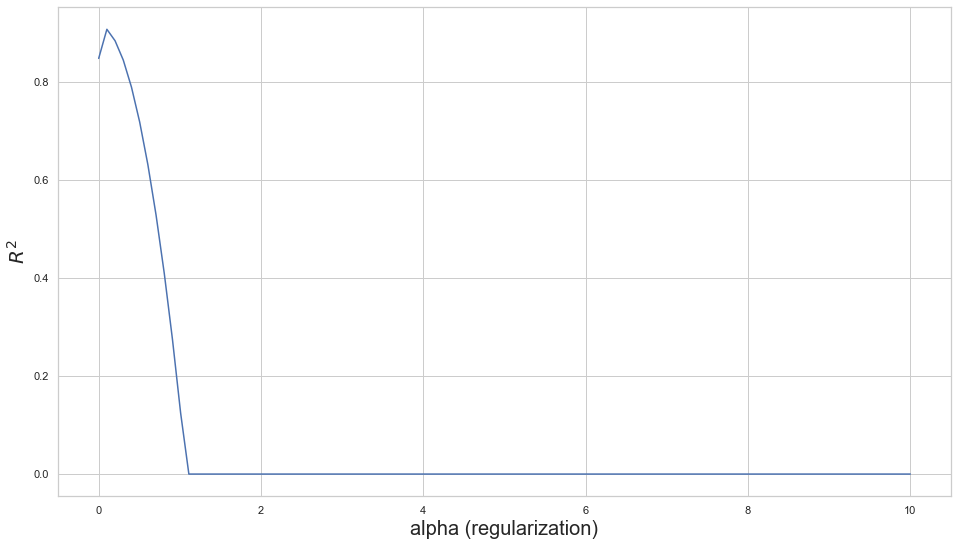

In [216]:
plt.plot(regularization_space, validation_score);
plt.xlabel('alpha (regularization)', size=20)
plt.ylabel(f'$R^2$', size=20)
plt.show()

In [217]:
alpha_val = regularization_space[validation_score.index(max(validation_score))]

In [218]:
X_train = pd.concat([X_train, X_val], axis=0)
y_train = pd.concat([y_train, y_val], axis=0)

In [219]:
lasso = Lasso(alpha=alpha_val)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.9090209828267095

### GridSearch

In [222]:
# Split target and predictors
X = df.drop(['price', 'color', 'clarity'], axis=1)
y = df['price']


# split data in train/ test/ 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

In [223]:
model = Ridge()
parameter_space = {'alpha': np.linspace(0, 100, 1000),
                   }

grid_search = GridSearchCV(model,
                           param_grid=parameter_space,
                           cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.8028028 ,   2.9029...
        96.4964965 ,  96.5965966 ,  96.6966967 ,  96.7967968 ,
        96.8968969 ,  96.996997  ,  97.0970971 ,  97.1971972 ,
        97.2972973 ,  97.3973974 ,  97.4974975 ,  97.5975976 ,
        97.6976977 ,  97.7977978 ,  97.8978979 ,  97.997998  ,
        98.0980981 ,  98.1981982 ,  98.2982983 ,  98.3983984 ,
        98.4984985 ,  98.5985986 ,  98.6986987 ,  98.7987988 ,
        98.8988989 ,  98.998999  ,  99.0990991 ,  99.1991992 ,
        99.2992993 ,  99.3993994 ,  99.4994995 ,  99.5995996 ,
        99.6996997 ,  99.7997998 ,  99.8998999 , 100.        ])})

In [224]:
Ridge()

Ridge()

In [225]:
best_model = grid_search.best_estimator_
best_model

Ridge(alpha=100.0)

In [226]:
y_pred = best_model.predict(X_test)

In [227]:
r2_score(y_test, y_pred)

0.9233039507828601

In [228]:
grid_search.best_score_

0.8941318189982876

In [134]:
# Importamos "test"
df_test = pd.read_csv('test.csv')
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
1,1,0.41,Ideal,E,VS2,61.8,54.0,4.79,4.76,2.95
2,2,0.91,Very Good,E,SI2,62.5,59.0,6.16,6.23,3.87
3,3,0.42,Very Good,G,VS2,62.6,57.0,4.76,4.80,2.99
4,4,0.54,Ideal,G,IF,61.5,56.0,5.28,5.25,3.24
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.55,Ideal,F,SI1,61.7,56.4,5.26,5.30,3.25
13481,13481,1.12,Premium,H,VS2,60.6,59.0,6.77,6.70,4.08
13482,13482,0.37,Ideal,D,SI1,61.5,57.0,4.63,4.60,2.84
13483,13483,0.54,Good,E,SI1,59.9,63.0,5.25,5.30,3.16
